In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("http://51.91.120.89/extras/veturilo.csv", parse_dates=True, usecols=["ts","qnty"], index_col="ts" )
df.head()

,qnty
ts,
2020-07-10 18:55:00,2
2020-07-10 19:00:00,2
2020-07-10 19:05:00,2
2020-07-10 19:10:00,2
2020-07-10 19:15:00,12


In [5]:
df.qnty.unique()

array(['2', '12', '7', '9', '8', '6', '5', '4', '1', '10', '11', '0', '3',
       '16', '17', '14', '15', '13', '18', '19', '?'], dtype=object)

In [7]:
df.qnty = df.qnty.replace("?", np.NaN).fillna(method='ffill').astype('uint8')

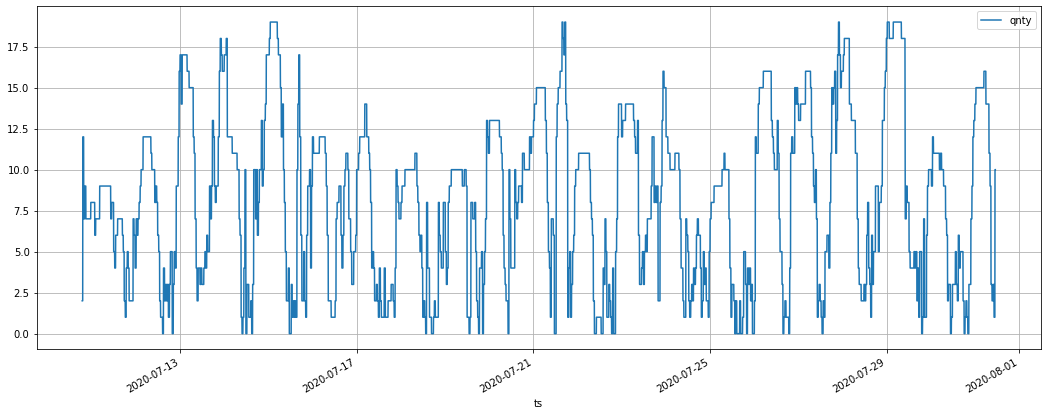

In [8]:
df.plot(grid=True, figsize=(18,7))

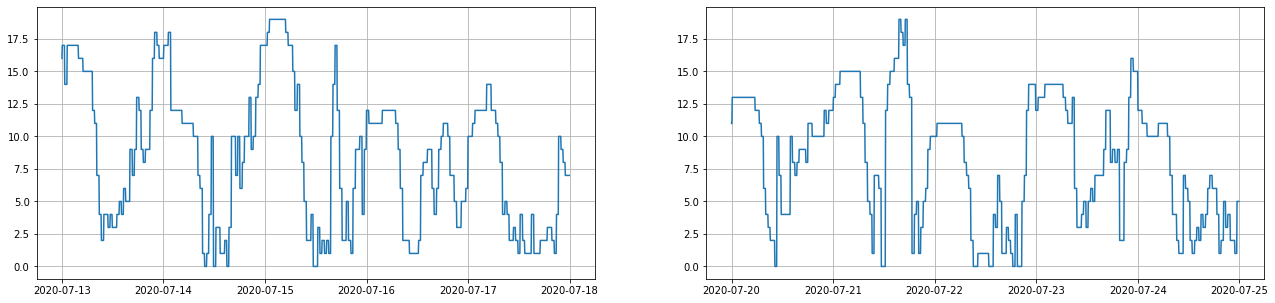

In [12]:
plt.subplots(1, 2, figsize=(22,5))

df_13_17 = df.loc["2020-07-13":"2020-07-17"]
plt.subplot(1, 2, 1)
plt.plot(df_13_17.index, df_13_17.qnty)
plt.grid()

df_20_24 = df.loc["2020-07-20":"2020-07-24"]
plt.subplot(1, 2, 2)
plt.plot(df_20_24.index, df_20_24.qnty)
plt.grid()

In [13]:
from statsmodels.stats.stattools import durbin_watson

2.044378661289986


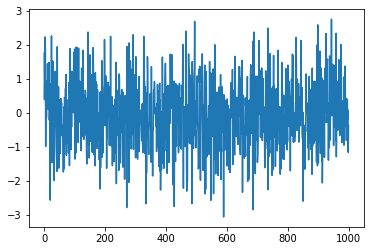

In [16]:
np.random.seed(0)
y = np.random.normal(0, 1, 1000)
plt.plot(y)
print(durbin_watson(y))

0.009886173184214862


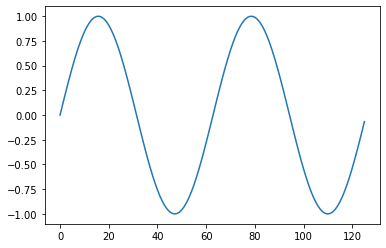

In [17]:
x = np.arange(-2*np.pi, 2*np.pi, .1)
y = np.sin(x)
plt.plot(y)
print(durbin_watson(y))

0.01273107592987821
0.010403013741540339


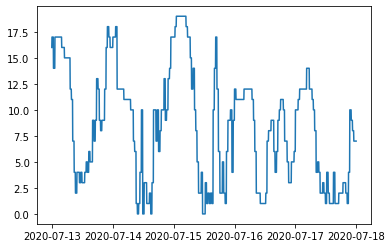

In [19]:
plt.plot(df_13_17.index, df_13_17.qnty)
print(durbin_watson(df_13_17.qnty))
print(durbin_watson(df_20_24.qnty))


In [20]:
from fbprophet import Prophet

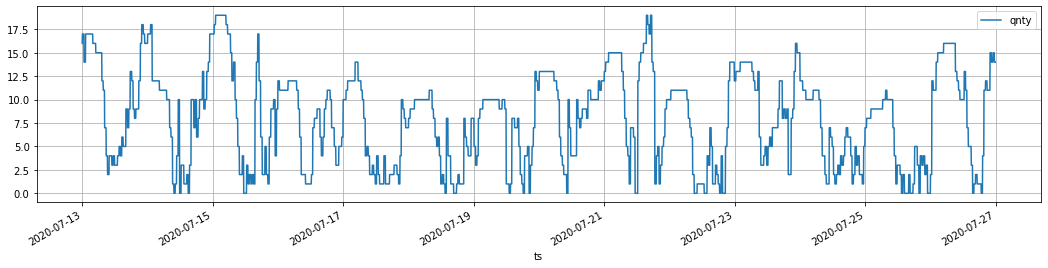

In [21]:
df_predict = df.loc["2020-07-13":"2020-07-26"]
df_predict.plot(grid=True, figsize=(18,4))

In [24]:
df_predict.reset_index(inplace=True)
df_predict.columns = ['ds','y']
df_predict.head()

,ds,y
0,2020-07-13 00:00:00,16
1,2020-07-13 00:05:00,17
2,2020-07-13 00:10:00,17
3,2020-07-13 00:15:00,17
4,2020-07-13 00:20:00,17


In [26]:
model = Prophet()
model.fit(df_predict)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [28]:
future = model.make_future_dataframe(freq='H', periods=48)
forecast = model.predict(future)

In [30]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

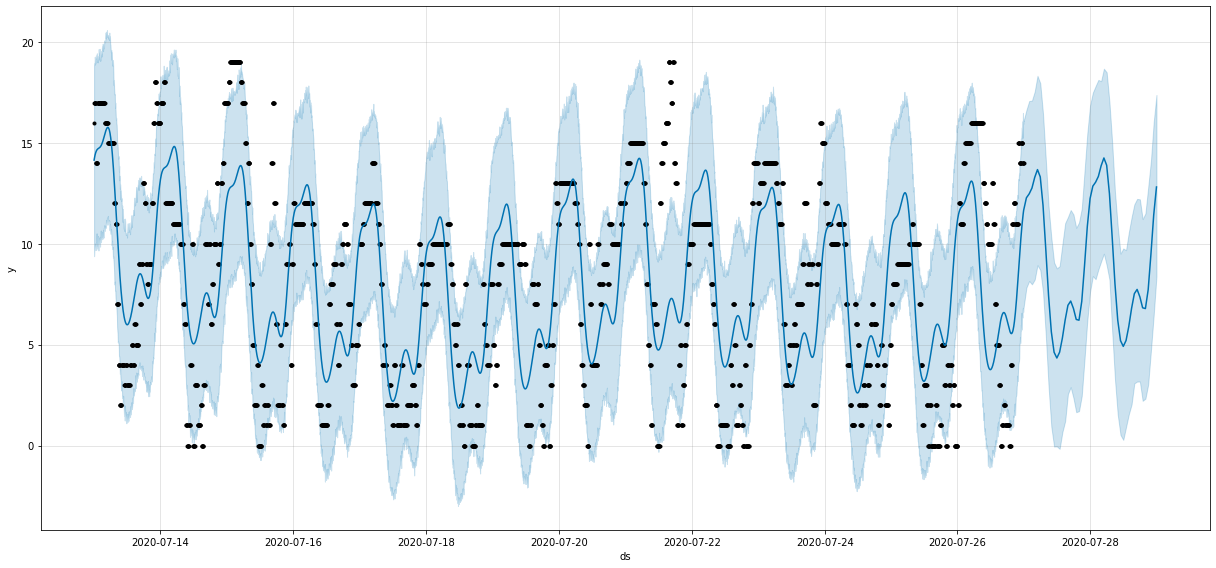

In [31]:
model.plot(forecast, figsize=(17,8));

In [32]:
df_27_28 = df.loc["2020-07-27":"2020-07-28"]
df_27_28.head()

,qnty
ts,
2020-07-27 00:00:00,14
2020-07-27 00:05:00,13
2020-07-27 00:10:00,13
2020-07-27 00:15:00,13
2020-07-27 00:20:00,13


In [36]:
df_tmp = forecast[ ["ds","yhat","yhat_lower","yhat_upper"] ].set_index("ds").loc["2020-07-27":"2020-07-28"]
df_tmp.head()

,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27 00:55:00,12.280544,7.827426,16.629485
2020-07-27 01:55:00,12.475460,8.154749,17.076485
2020-07-27 02:55:00,12.761696,7.990422,17.099580
2020-07-27 03:55:00,13.291591,8.225202,17.548858
2020-07-27 04:55:00,13.677960,8.940909,18.325632


In [37]:
df_res = pd.concat([df_27_28,df_tmp], axis=1)
df_res.head()

,qnty,yhat,yhat_lower,yhat_upper
2020-07-27 00:00:00,14,NaN,NaN,NaN
2020-07-27 00:05:00,13,NaN,NaN,NaN
2020-07-27 00:10:00,13,NaN,NaN,NaN
2020-07-27 00:15:00,13,NaN,NaN,NaN
2020-07-27 00:20:00,13,NaN,NaN,NaN


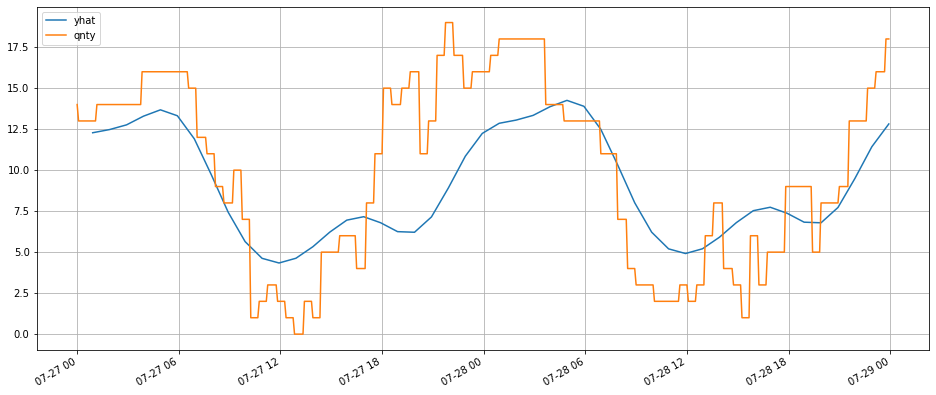

In [40]:
df_res.yhat[ ~df_res.yhat.isna() ].plot()
df_res.qnty.plot( figsize=(16,7), grid=True)
plt.legend()